In [1]:
pip install yfinance


Note: you may need to restart the kernel to use updated packages.


In [1]:
import yfinance as yf
import pandas as pd

In [2]:
tickers = ["XLK","XLF","XLV","XLE","XLY","XLP","XLI","XLB","XLU","XLRE","XLC"]

raw = yf.download(
    tickers,
    start="2018-01-01",
    end="2023-12-31",
    auto_adjust=False,
    progress=False
)

raw.head()


Price       Adj Close                                                  \
Ticker            XLB XLC        XLE        XLF        XLI        XLK   
Date                                                                    
2018-01-02  26.111284 NaN  25.915482  24.006912  66.441017  29.910067   
2018-01-03  26.294176 NaN  26.303604  24.135889  66.798859  30.159555   
2018-01-04  26.523861 NaN  26.462378  24.359451  67.287674  30.312010   
2018-01-05  26.736523 NaN  26.451792  24.428236  67.750290  30.630793   
2018-01-08  26.774803 NaN  26.610569  24.393847  68.029602  30.746296   

Price                                                   ... Volume            \
Ticker            XLP       XLRE        XLU        XLV  ...    XLC       XLE   
Date                                                    ...                    
2018-01-02  45.569622  25.004520  20.273338  73.022293  ...    NaN  29782800   
2018-01-03  45.553505  25.012157  20.114067  73.721001  ...    NaN  38599200   
2018-01-04  45.682461  24.584602  19.947046  73.825821  ...    NaN  28613600   
2018-01-05  45.883957  24.638042  19.939272  74.454643  ...    NaN  28408800   
2018-01-08  45.996788  24.806019  20.125729  74.183891  ...    NaN  19558400   

Price                                                                  \
Ticker           XLF       XLI       XLK       XLP     XLRE       XLU   
Date                                                                    
2018-01-02  55436100  14903900  27445600  20146800  1744200  24540000   
2018-01-03  56906200  18155000  22663600  17950400  1715100  41615800   
2018-01-04  62247000  16483000  21493200  15455100  1824100  29943600   
2018-01-05  37989500  16996200  19356000  15555100  1400200  46832600   
2018-01-08  44252100   5727500  13467800  12891000   990600  28601000   

Price                          
Ticker          XLV       XLY  
Date                           
2018-01-02  6708900   9791200  
2018-01-03  7606500  10638000  
2018-01-04  7762500   6914800  
2018-01-05  7579300   8588800  
2018-01-08  5167300   5340000  

[5 rows x 66 columns]

In [3]:
# Pull out Adjusted Close prices only (this is what we analyze)
prices = raw["Adj Close"].copy()

# Quick check
print(prices.shape)
prices.head()


(1509, 11)


Ticker,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
Date,,,,,,,,,,,
2018-01-02,26.111284,NaN,25.915482,24.006912,66.441017,29.910067,45.569622,25.004520,20.273338,73.022293,46.368191
2018-01-03,26.294176,NaN,26.303604,24.135889,66.798859,30.159555,45.553505,25.012157,20.114067,73.721001,46.581089
2018-01-04,26.523861,NaN,26.462378,24.359451,67.287674,30.312010,45.682461,24.584602,19.947046,73.825821,46.733810
2018-01-05,26.736523,NaN,26.451792,24.428236,67.750290,30.630793,45.883957,24.638042,19.939272,74.454643,47.104053
2018-01-08,26.774803,NaN,26.610569,24.393847,68.029602,30.746296,45.996788,24.806019,20.125729,74.183891,47.159588


In [4]:
# Keep only dates where all tickers have data
prices_clean = prices.dropna()

print("Prices start:", prices_clean.index.min())
print("Prices end:", prices_clean.index.max())
prices_clean.head()


Prices start: 2018-06-19 00:00:00
Prices end: 2023-12-29 00:00:00


Ticker,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
Date,,,,,,,,,,,
2018-06-19,25.089109,46.472137,26.737791,23.704647,64.433464,33.221363,41.704494,24.397999,19.823647,74.649940,52.020676
2018-06-20,25.007605,47.048859,26.855848,23.643969,64.477432,33.291138,41.745335,24.661350,19.839447,74.808296,52.267334
2018-06-21,24.741663,46.760494,26.358585,23.574636,63.667957,33.035328,41.827003,24.808512,19.906593,74.377251,51.895027
2018-06-22,25.101978,46.965141,26.884474,23.461966,63.887928,32.928356,42.170059,25.025385,20.044836,74.711548,51.806599
2018-06-25,24.711639,45.997734,26.344278,23.210623,63.078430,32.244667,42.382404,24.963415,20.376614,74.025352,50.680367


In [5]:
returns = prices_clean.pct_change().dropna()
returns.head()


Ticker,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
Date,,,,,,,,,,,
2018-06-20,-0.003249,0.012410,0.004415,-0.002560,0.000682,0.002100,0.000979,0.010794,0.000797,0.002121,0.004742
2018-06-21,-0.010634,-0.006129,-0.018516,-0.002932,-0.012554,-0.007684,0.001956,0.005967,0.003384,-0.005762,-0.007123
2018-06-22,0.014563,0.004376,0.019951,-0.004779,0.003455,-0.003238,0.008202,0.008742,0.006945,0.004495,-0.001704
2018-06-25,-0.015550,-0.020598,-0.020093,-0.010713,-0.012671,-0.020763,0.005035,-0.002476,0.016552,-0.009185,-0.021739
2018-06-26,0.003819,0.001658,0.012629,-0.003361,0.003767,0.004039,-0.004240,0.005275,0.001163,-0.003089,0.007163


In [6]:
import numpy as np

# COVID crash window (common choice)
covid_start = "2020-02-19"
covid_bottom = "2020-03-23"
covid_end = "2020-12-31"


In [7]:
cum = (1 + returns).cumprod()
cum.head()


Ticker,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
Date,,,,,,,,,,,
2018-06-20,0.996751,1.012410,1.004415,0.997440,1.000682,1.002100,1.000979,1.010794,1.000797,1.002121,1.004742
2018-06-21,0.986152,1.006205,0.985818,0.994515,0.988119,0.994400,1.002938,1.016826,1.004184,0.996347,0.997585
2018-06-22,1.000513,1.010609,1.005486,0.989762,0.991533,0.991180,1.011163,1.025715,1.011158,1.000825,0.995885
2018-06-25,0.984955,0.989792,0.985283,0.979159,0.978970,0.970600,1.016255,1.023175,1.027894,0.991633,0.974235
2018-06-26,0.988716,0.991433,0.997726,0.975868,0.982658,0.974521,1.011947,1.028572,1.029090,0.988570,0.981213


In [8]:
crash = cum.loc[covid_start:covid_bottom]
peak = crash.cummax()
drawdown = crash / peak - 1

max_dd = drawdown.min().sort_values()  # more negative = worse
max_dd


Ticker
XLE    -0.562808
XLF    -0.427891
XLI    -0.415801
XLRE   -0.388248
XLB    -0.363144
XLU    -0.355949
XLY    -0.339102
XLK    -0.311532
XLC    -0.301494
XLV    -0.279295
XLP    -0.243488
dtype: float64

In [9]:
covid_period = cum.loc[covid_start:covid_end]
total_return = (covid_period.iloc[-1] / covid_period.iloc[0] - 1).sort_values(ascending=False)
total_return


Ticker
XLK     0.280818
XLY     0.229170
XLB     0.222520
XLC     0.181987
XLV     0.109213
XLP     0.075326
XLI     0.073984
XLF    -0.028411
XLU    -0.074920
XLRE   -0.083041
XLE    -0.263006
dtype: float64

In [12]:
# Define true pre-crash peak (highest cumulative value before crash)
pre_crash_peak = cum.loc[:covid_start].max()

# Data after the crash bottom
after_bottom = cum.loc[covid_bottom:]

recovery_days = {}

for t in after_bottom.columns:
    recovered = after_bottom[t][after_bottom[t] >= pre_crash_peak[t]]
    recovery_days[t] = (
        (recovered.index[0] - after_bottom.index[0]).days
        if len(recovered) > 0 else np.nan
    )

recovery_days = pd.Series(recovery_days).sort_values()
recovery_days


XLY      77
XLK      78
XLC     109
XLV     114
XLB     116
XLP     142
XLI     231
XLF     289
XLRE    374
XLU     500
XLE     666
dtype: int64

In [13]:
results = pd.DataFrame({
    "Max Drawdown (Crash)": max_dd,
    "Total Return (Feb19-Dec31 2020)": total_return,
    "Recovery Days (to Feb19 level)": recovery_days
})

results


,Max Drawdown (Crash),Total Return (Feb19-Dec31 2020),Recovery Days (to Feb19 level)
XLB,-0.363144,0.222520,116
XLC,-0.301494,0.181987,109
XLE,-0.562808,-0.263006,666
XLF,-0.427891,-0.028411,289
XLI,-0.415801,0.073984,231
XLK,-0.311532,0.280818,78
XLP,-0.243488,0.075326,142
XLRE,-0.388248,-0.083041,374
XLU,-0.355949,-0.074920,500
XLV,-0.279295,0.109213,114


In [19]:
out = results.copy()

# Convert to % where appropriate
out["Max Drawdown (Crash) %"] = (out["Max Drawdown (Crash)"] * 100).round(1)
out["Total Return (Feb19-Dec31 2020) %"] = (out["Total Return (Feb19-Dec31 2020)"] * 100).round(1)

# Keep recovery as days (already good)
out["Recovery Days (to Feb19 level)"] = out["Recovery Days (to Feb19 level)"].astype(int)

# Rankings: lower drawdown is better, higher return is better, fewer days is better
out["Rank Drawdown (best=1)"] = out["Max Drawdown (Crash)"].rank(ascending=False).astype(int)  # less negative = better
out["Rank Return (best=1)"] = out["Total Return (Feb19-Dec31 2020)"].rank(ascending=False).astype(int)
out["Rank Recovery (best=1)"] = out["Recovery Days (to Feb19 level)"].rank(ascending=True).astype(int)

# Simple overall score (equal weight)
out["Overall Score (lower=better)"] = (
    out["Rank Drawdown (best=1)"] + out["Rank Return (best=1)"] + out["Rank Recovery (best=1)"]
)

# Show the clean table
out_sorted = out.sort_values("Overall Score (lower=better)")
out_sorted[[
    "Max Drawdown (Crash) %",
    "Total Return (Feb19-Dec31 2020) %",
    "Recovery Days (to Feb19 level)",
    "Overall Score (lower=better)"
]]


,Max Drawdown (Crash) %,Total Return (Feb19-Dec31 2020) %,Recovery Days (to Feb19 level),Overall Score (lower=better)
XLK,-31.2,28.1,78,7
XLY,-33.9,22.9,77,8
XLC,-30.1,18.2,109,10
XLV,-27.9,10.9,114,11
XLP,-24.3,7.5,142,13
XLB,-36.3,22.3,116,15
XLI,-41.6,7.4,231,23
XLU,-35.6,-7.5,500,25
XLF,-42.8,-2.8,289,26
XLRE,-38.8,-8.3,374,27


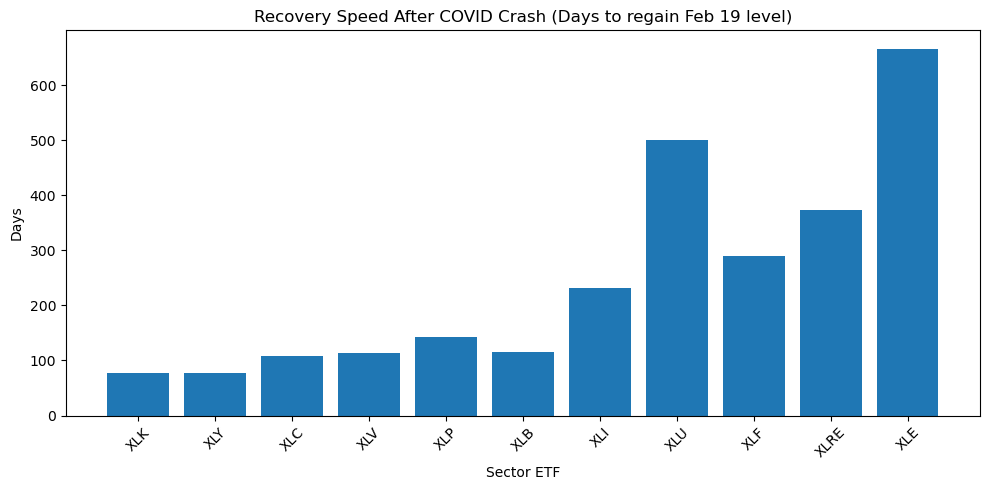

In [16]:
import matplotlib.pyplot as plt

plot_df = out_sorted.copy()

plt.figure(figsize=(10,5))
plt.bar(plot_df.index, plot_df["Recovery Days (to Feb19 level)"])
plt.title("Recovery Speed After COVID Crash (Days to regain Feb 19 level)")
plt.xlabel("Sector ETF")
plt.ylabel("Days")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


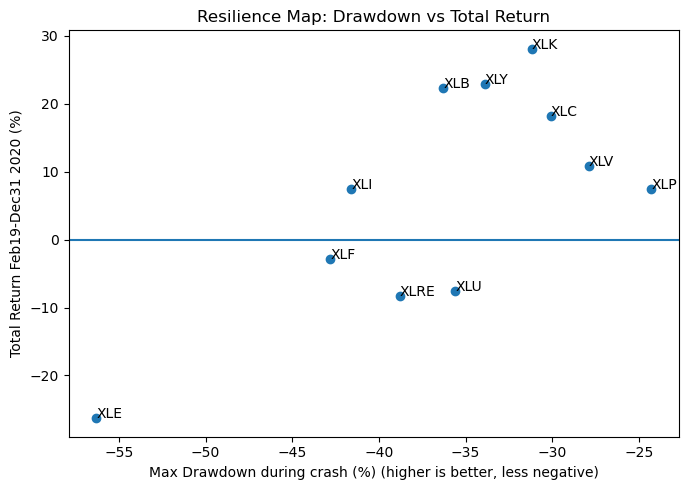

In [17]:
plt.figure(figsize=(7,5))
plt.scatter(
    out["Max Drawdown (Crash) %"],
    out["Total Return (Feb19-Dec31 2020) %"]
)

for t in out.index:
    plt.text(out.loc[t, "Max Drawdown (Crash) %"], out.loc[t, "Total Return (Feb19-Dec31 2020) %"], t)

plt.title("Resilience Map: Drawdown vs Total Return")
plt.xlabel("Max Drawdown during crash (%) (higher is better, less negative)")
plt.ylabel("Total Return Feb19-Dec31 2020 (%)")
plt.axhline(0)
plt.tight_layout()
plt.show()


In [18]:
out_sorted.to_csv("sector_resilience_results.csv")
print("Saved: sector_resilience_results.csv")


Saved: sector_resilience_results.csv
